In [94]:
import requests
from bs4 import BeautifulSoup
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from termcolor import colored, cprint

In [214]:
base_url = "https://understat.com/match/"
match_id =  str(input('Enter Match ID:'))
url = base_url + match_id

In [215]:
res = requests.get(url)
soup = BeautifulSoup(res.content, 'lxml')
title = str(soup.find_all('title'))
title = (title.split('>'))
title = title[1]
title = (title.split('|'))
title_main = title[0]
title_sub = title[1] + title[2]

title_main = (title_main.split('-'))
title_main_home = title_main[0]
title_main_away = title_main[1]

In [256]:
res = requests.get(url)
soup = BeautifulSoup(res.content, 'lxml')
scripts = soup.find_all('script')

In [257]:
strings = scripts[1].string

index_start = strings.index("('")+2
index_end = strings.index("')")

json_data = strings[index_start:index_end]
json_data = json_data.encode('utf8').decode('unicode_escape')

data = json.loads(json_data)

In [258]:
team = []
minute = []
xG = []
data_home = data['h']
data_away = data['a']
player = []
result = []
hora = []

for index in range(len(data_home)):
    for key in data_home[index]:
        if key == 'h_team':
            team.append(data_home[index][key])
        if key == 'minute':
            minute.append(data_home[index][key])
        if key == 'xG':
            xG.append(data_home[index][key])
        if key == 'player':
            player.append(data_home[index][key])
        if key == 'result':
            result.append(data_home[index][key])
        if key == 'h_a':
            hora.append(data_home[index][key])
        
for index in range(len(data_away)):
    for key in data_away[index]:
        if key == 'a_team':
            team.append(data_away[index][key])
        if key == 'minute':
            minute.append(data_away[index][key])   
        if key == 'xG':
            xG.append(data_away[index][key])
        if key == 'player':
            player.append(data_away[index][key])
        if key == 'result':
            result.append(data_away[index][key])
        if key == 'h_a':
            hora.append(data_away[index][key])

In [259]:
col_names = [ 'team', 'minute', 'xG', 'player', 'result', 'hora']
df = pd.DataFrame([team,minute,xG,player,result,hora], index = col_names)
df = df.T

df['xG'] = pd.to_numeric(df['xG'])

df.loc[df['hora'] == 'h', 'hora'] = 0
df.loc[df['hora'] == 'a', 'hora'] = 1

In [260]:
df

,team,minute,xG,player,result,hora
0,Lokomotiv Moscow,3,0.032543,Anton Miranchuk,SavedShot,0
1,Lokomotiv Moscow,17,0.192106,Zé Luís,SavedShot,0
2,Lokomotiv Moscow,17,0.371736,Zé Luís,SavedShot,0
3,Lokomotiv Moscow,23,0.022443,Vladislav Ignatjev,BlockedShot,0
4,Lokomotiv Moscow,32,0.013975,Anton Miranchuk,MissedShots,0
5,Lokomotiv Moscow,42,0.074936,Vladislav Ignatjev,MissedShots,0
6,Lokomotiv Moscow,42,0.045133,Anton Miranchuk,MissedShots,0
7,Lokomotiv Moscow,52,0.172324,Murilo Cerqueira,SavedShot,0
8,Lokomotiv Moscow,71,0.754275,Anton Miranchuk,Goal,0
9,Arsenal Tula,4,0.082365,Kirill Panchenko,BlockedShot,1


In [261]:
Team_Names = df.team.unique()
Home_Team_Name = str(Team_Names[0])
Away_Team_Name = str(Team_Names[1])

In [262]:
last_shot_minute = int(max(minute))
print(last_shot_minute)

if last_shot_minute < 90:
    last_shot_minute = 90.01
elif last_shot_minute >= 90:
    last_shot_minute = last_shot_minute


86


In [263]:
team = []
minute = []
xG = []
data_home = data['h']
data_away = data['a']
player = []
result = []
hora = []


In [264]:
for index in range(len(data_home)):
    for key in data_home[index]:
        if key == 'h_team':
            team.append(data_home[index][key])
        if key == 'minute':
            minute.append(data_home[index][key])
        if key == 'xG':
            xG.append(data_home[index][key])
        if key == 'player':
            player.append(data_home[index][key])
        if key == 'result':
            result.append(data_home[index][key])
        if key == 'h_a':
            hora.append(data_home[index][key])

col_names = [ 'team', 'minute', 'xG', 'player', 'result', 'hora']
df_home = pd.DataFrame([team,minute,xG,player,result,hora], index = col_names)
df_home = df_home.T

df_home['xG'] = pd.to_numeric(df_home['xG']) 

df_home.loc[df_home['hora'] == 'h', 'hora'] = 0 
df_home.loc[df_home['hora'] == 'a', 'hora'] = 1

In [265]:
col_names = [ 'minute', 'xG']
df_zero = pd.DataFrame([0,0], index = col_names)
df_zero = df_zero.T

In [266]:
minute = [int(i) for i in minute]

xG = [float(i) for i in xG]
xG = np.cumsum(xG)

xG_home_max = max(xG)
col_names = [ 'minute', 'xG']
df_home_max = pd.DataFrame([last_shot_minute,xG_home_max], index = col_names)
df_home_max = df_home_max.T

col_names = [ 'minute', 'xG']
xG_home = pd.DataFrame([minute,xG], index = col_names)
xG_home = xG_home.T
xG_home = df_zero.append(xG_home)
xG_home = xG_home.append(df_home_max)
xG_home

,minute,xG
0,0.00,0.000000
0,3.00,0.032543
1,17.00,0.224649
2,17.00,0.596384
3,23.00,0.618828
4,32.00,0.632803
5,42.00,0.707739
6,42.00,0.752871
7,52.00,0.925196
8,71.00,1.679471


In [267]:
team = []
minute = []
xG = []
data_home = data['h']
data_away = data['a']
player = []
result = []
hora = []

In [268]:
for index in range(len(data_away)):
    for key in data_away[index]:
        if key == 'a_team':
            team.append(data_away[index][key])
        if key == 'minute':
            minute.append(data_away[index][key])   
        if key == 'xG':
            xG.append(data_away[index][key])
        if key == 'player':
            player.append(data_away[index][key])
        if key == 'result':
            result.append(data_away[index][key])
        if key == 'h_a':
            hora.append(data_away[index][key])

col_names = [ 'team', 'minute', 'xG', 'player', 'result', 'hora']
df_away = pd.DataFrame([team,minute,xG,player,result,hora], index = col_names)
df_away = df_away.T 

df_away['xG'] = pd.to_numeric(df_away['xG']) 

df_away.loc[df_away['hora'] == 'h', 'hora'] = 0 
df_away.loc[df_away['hora'] == 'a', 'hora'] = 1

In [269]:
minute = [int(i) for i in minute]

xG = [float(i) for i in xG]
xG = np.cumsum(xG)

xG_away_max = max(xG)
col_names = [ 'minute', 'xG']
df_away_max = pd.DataFrame([last_shot_minute,xG_away_max], index = col_names)
df_away_max = df_away_max.T

col_names = [ 'minute', 'xG']
xG_away = pd.DataFrame([minute,xG], index = col_names)
xG_away = xG_away.T
xG_away = df_zero.append(xG_away)
xG_away = xG_away.append(df_away_max)
xG_away

,minute,xG
0,0.00,0.000000
0,4.00,0.082365
1,6.00,0.092539
2,13.00,0.140648
3,21.00,0.196393
4,48.00,0.265707
5,48.00,0.296078
6,53.00,0.402999
7,55.00,0.423911
8,58.00,0.502927


In [270]:
xG_overall_max =  max(xG_home_max, xG_away_max)

In [271]:
xG_home_suptitle = round(xG_home_max,2)
xG_away_suptitle = round(xG_away_max,2)

In [272]:
plt_suptitle = title_main_home + '(' + str(xG_home_suptitle) + ' xG'+ ")" + " - "+ '(' + str(xG_away_suptitle) + ' xG'+ ')' + title_main_away 

In [273]:
xG_home_shots = xG_home[1:-1]
xG_home_shots.minute = xG_home_shots.minute.round(0)
xG_home_shots.xG = xG_home_shots.xG.round(2)

xG_away_shots = xG_away[1:-1]
xG_away_shots.minute = xG_away_shots.minute.round(0)
xG_away_shots.xG = xG_away_shots.xG.round(2)

In [274]:
xG_home_shots = xG_home_shots.to_string(index=False)
xG_away_shots = xG_away_shots.to_string(index=False)

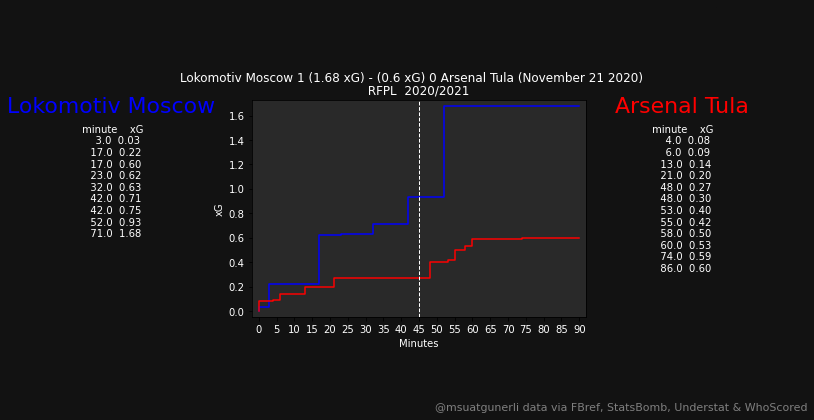

In [301]:
fig, ax = plt.subplots(nrows=1, ncols=1)
fig.set_facecolor('#121212')

ax.set_facecolor('#292929')

plt.plot(xG_home.minute,xG_home.xG, drawstyle='steps-pre', color = 'b')
plt.plot(xG_away.minute,xG_away.xG, drawstyle='steps-pre', color = 'r')

plt.title(title_sub, color='white')
plt.suptitle(plt_suptitle, color='white')

plt.xlabel('Minutes',color='white')
plt.ylabel('xG', rotation = 90,color='white')
plt.axvline(x=45, color='white', linestyle='--', linewidth=1.0)

x_ticks = np.arange(0, last_shot_minute, 5)
plt.xticks(x_ticks,color='white')
plt.xlim([-2, last_shot_minute + 2])

y_ticks = np.arange(0, xG_overall_max, 0.2)
plt.yticks(y_ticks, color='white')
plt.ylim([-0.05, xG_overall_max + 0.05])

plt.gcf().text(-0.2, 0.835, Home_Team_Name, fontsize= 22,color='blue', ha='center')
plt.gcf().text(-0.2, 0.795, (xG_home_shots), fontsize= 10 ,color='white', ha='center', va = 'top')
plt.gcf().text(-0.2, -0.2, '.', fontsize=1)

plt.gcf().text(1.12, 0.835, Away_Team_Name, fontsize= 22,color='red', ha='center')
plt.gcf().text(1.12, 0.795, (xG_away_shots), fontsize= 10 ,color='white', ha='center', va = 'top')
plt.gcf().text(1.2, 1.2, '.', fontsize=1)

fig.text(.55,-0.2,"@msuatgunerli data via FBref, StatsBomb, Understat & WhoScored",fontsize=11,color='#7F7F7F')

plt.show()


In [276]:
print(title_main_home + '(' + colored(str(xG_home_suptitle),'blue') + ")" + " - "+ '(' + colored(str(xG_away_suptitle), 'red') + ')' + title_main_away)

Lokomotiv Moscow 1 (1.68) - (0.6) 0 Arsenal Tula (November 21 2020) 
